In [2]:
# import packages
import pandas as pd

In [3]:
# raw data
data = pd.read_parquet('../data/all_means_df.pqt')

In [4]:
# mean clearness
clearness_df = pd.read_csv('../data/input_smodel.csv')

In [5]:
clearness_df.columns

Index(['id', 'date', 'hour_std', 'tsun_std', 'is clear_std',
       'code available_std', 'hour_mean', 'tsun_mean', 'is clear_mean',
       'code available_mean'],
      dtype='object')

In [6]:
clearness_df=clearness_df[['id','is clear_mean']].groupby(['id']).mean()

In [7]:
clearness_df.index = clearness_df.index.astype('str')

In [8]:
full_data = data.join(clearness_df)

In [9]:
data = full_data.loc[full_data['is clear_mean'].isna()==False]

In [10]:
data

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,is clear_mean
id,,,,,,,,,,
10015,10.936814,7.477791,79.947582,0.089194,204.287527,26.965759,37.540909,1014.087925,12.650690,0.188839
10020,10.451094,6.789513,79.452712,0.074267,205.829421,26.275399,38.887773,1013.542898,12.665966,0.178221
10022,10.018232,6.643208,81.443326,0.093980,193.680252,17.103179,28.103705,1013.934051,11.820358,0.167444
10028,10.505162,7.083428,80.923883,0.086501,202.931974,22.963651,34.654543,1014.124829,13.346736,0.187918
10035,10.103840,6.658508,81.273511,0.102419,196.195419,13.532182,26.738500,1014.214114,12.459606,0.163400
...,...,...,...,...,...,...,...,...,...,...
10948,8.005150,4.198112,79.941469,0.191051,193.951117,7.083029,14.243301,1018.080509,11.875057,0.244558
10961,-2.778965,-7.243885,76.859840,0.224373,232.599072,21.609182,38.491932,1018.143157,14.008219,0.195093
10962,8.892688,3.691526,73.397637,0.127314,178.822470,14.827336,26.590399,1017.905872,14.438769,0.221522


In [11]:
# choose the cutoffs for minimum sunhours, minimum clearness and maximum clearness std
# by specifying the cutoff percentiles
sunhrs_percentile = .3
clearness_percentile = .3

In [12]:
sun_hrs_min = data.tsun.sort_values()[int(len(data)*sunhrs_percentile)]
clearness_pct_min = data['is clear_mean'].sort_values()[int(len(data)*sunhrs_percentile)]

In [13]:
data.loc[:,'suited for PV'] = 0
data.loc[   (data['tsun']>=sun_hrs_min) &
              (data['is clear_mean']>=clearness_pct_min)\
           ,'suited for PV'] = 1

G:\Anaconda\envs\mapenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
G:\Anaconda\envs\mapenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
data

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,is clear_mean,suited for PV
id,,,,,,,,,,,
10015,10.936814,7.477791,79.947582,0.089194,204.287527,26.965759,37.540909,1014.087925,12.650690,0.188839,0
10020,10.451094,6.789513,79.452712,0.074267,205.829421,26.275399,38.887773,1013.542898,12.665966,0.178221,0
10022,10.018232,6.643208,81.443326,0.093980,193.680252,17.103179,28.103705,1013.934051,11.820358,0.167444,0
10028,10.505162,7.083428,80.923883,0.086501,202.931974,22.963651,34.654543,1014.124829,13.346736,0.187918,0
10035,10.103840,6.658508,81.273511,0.102419,196.195419,13.532182,26.738500,1014.214114,12.459606,0.163400,0
...,...,...,...,...,...,...,...,...,...,...,...
10948,8.005150,4.198112,79.941469,0.191051,193.951117,7.083029,14.243301,1018.080509,11.875057,0.244558,0
10961,-2.778965,-7.243885,76.859840,0.224373,232.599072,21.609182,38.491932,1018.143157,14.008219,0.195093,1
10962,8.892688,3.691526,73.397637,0.127314,178.822470,14.827336,26.590399,1017.905872,14.438769,0.221522,1


In [15]:
data.columns

Index(['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'is clear_mean', 'suited for PV'],
      dtype='object')

In [16]:
# set model x and y data
y=data['suited for PV']
x_cols=['dwpt','rhum','prcp','wdir','pres']
x=data[x_cols]

In [17]:
# train test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=.2,
    stratify=y,
    random_state=1
)

# import model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
from sklearn.metrics import accuracy_score, confusion_matrix
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
confusion_matrix(ytest,ypred)
accuracy_score(ytest,ypred)

0.6285714285714286

In [18]:
# import Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# run models

# collect accuracy scores in dict to compare
acc_dict = {} 
##### Decision Tree

# Fitting des Decision Tree Algorithmus auf den Trainingsdatensatz
decision_tree_train = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
decision_tree_train.fit(xtrain, ytrain)

# Der Decision Tree Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("Prognosegenauigkeit Decision Tree:\n")
print("Testdaten:\t", decision_tree_train.score(xtest, ytest))
acc_dict['decision tree'] = decision_tree_train.score(xtest, ytest)

##### Random Forest

# Fitting des Random Forest Algorithmus auf den Trainingsdatensatz
random_forest_train = RandomForestClassifier(random_state=1)
random_forest_train.fit(xtrain, ytrain)

# Der Random Forest Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Random Forest:\n")
print("Testdaten:\t", random_forest_train.score(xtest, ytest))
acc_dict['random forest']= random_forest_train.score(xtest, ytest)


##### Logistic Regression

# Fitting des Logistic Regression Algorithmus auf den Trainingsdatensatz
logistic_regression_train = LogisticRegression(max_iter=1000)
logistic_regression_train.fit(xtrain, ytrain)

# Der Logistic Regression Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Logistic Regression:\n")
print("Testdaten:\t", logistic_regression_train.score(xtest, ytest))
acc_dict['logistic regression']= logistic_regression_train.score(xtest, ytest)


##### K-Nearest Neighbors

# Fitting des K-Nearest Neighbors Algorithmus auf den Trainingsdatensatz
knn_train = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_train.fit(xtrain, ytrain)

# Der K-Nearest Neighbors Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit K-Nearest Neighbors:\n")
print("Testdaten:\t", knn_train.score(xtest, ytest))
acc_dict['knearest neighbors']=knn_train.score(xtest, ytest)

##### Neuronales Netz

# Fitting des Neuronalen Netz Algorithmus auf den Trainingsdatensatz
neuronales_netz_train = MLPClassifier(max_iter=1000)
neuronales_netz_train.fit(xtrain, ytrain)

# Der Neuronales Netz Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Neuronales Netz:\n")
print("Testdaten:\t", neuronales_netz_train.score(xtest, ytest))
acc_dict['neuronales netz']=neuronales_netz_train.score(xtest, ytest)

##### Gradient Tree Boosting

# Fitting des Gradient Boosting Algorithmus auf den Trainingsdatensatz
gradient_booosting_train = GradientBoostingClassifier()
gradient_booosting_train.fit(xtrain, ytrain)

# Der Gradient Boosting Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Gradient Tree Boosting:\n")
print("Testdaten:\t", gradient_booosting_train.score(xtest, ytest))
acc_dict['gradient boosting']= gradient_booosting_train.score(xtest, ytest)


Prognosegenauigkeit Decision Tree:

Testdaten:	 0.7142857142857143


Prognosegenauigkeit Random Forest:

Testdaten:	 0.8285714285714286


Prognosegenauigkeit Logistic Regression:

Testdaten:	 0.7142857142857143


Prognosegenauigkeit K-Nearest Neighbors:

Testdaten:	 0.6


Prognosegenauigkeit Neuronales Netz:

Testdaten:	 0.5142857142857142


Prognosegenauigkeit Gradient Tree Boosting:

Testdaten:	 0.7142857142857143


<AxesSubplot:title={'center':'Accuracy of ML models for suitable solar power locations'}>

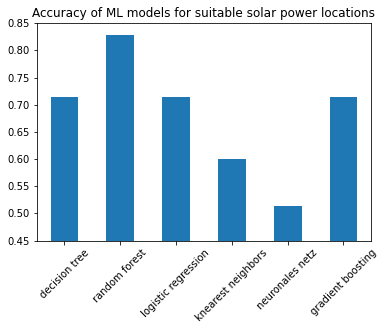

In [22]:
# turn accuracy dict into dataframe and plot
acc_df = pd.DataFrame(acc_dict,index=['accuracy score']).T
acc_df.plot(kind='bar',ylim=(0.45,0.85),rot=45,title='Accuracy of ML models for suitable solar power locations',legend=False)
# random forest leads to the best results

In [118]:
# fill na in full_data
full_data = full_data.fillna(full_data.mean())

In [124]:
# train a new model will all of the available data and predict for the full data set
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(x,y)
full_data.loc[:,'pv_prediction'] = random_forest.predict(full_data[x_cols])

In [129]:
data['suited for PV'].value_counts()

1    97
0    78
Name: suited for PV, dtype: int64

In [127]:
full_data.pv_prediction.value_counts()

0    563
1    525
Name: pv_prediction, dtype: int64

In [130]:
full_data.to_csv('../data/solarmodel_prediction.csv')